## Data

The main data points need be checked on the usability and if it usable and the main prediction on if it will be usable. 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

## Adding the data to the form

In [2]:
raw_data = pd.read_csv('C:/Users/Kennedy/Documents/BelgiumCampus/school work/Third year/MGL382/Project1/data/raw_data.csv')
meta = pd.read_csv('C:/Users/Kennedy/Documents/BelgiumCampus/school work/Third year/MGL382/Project1/data/metadata.csv')


Checking the amount of missing values

In [3]:
Dependents_total = raw_data['Dependents'].value_counts()
missing_values_of_Dependents = meta.loc[meta['Column Name'] == 'Dependents', 'missing Values'].values[0]
missing_values_of_Dependents

15

Now we see if the missing data is greater than 10% 

In [4]:
# Calculate the percentage of missing values
total_Dependents = raw_data['Dependents'].shape[0]
percentage_missing_data = (missing_values_of_Dependents / total_Dependents) * 100

percentage_missing_data

2.44299674267101

## Evaluting the data through the outcome(Loan_Status)

We must see if the data example if the number of dependents effect the outcome of the data. So we must compare of having zero dependents have any effect from the on the status. 

In [5]:
#Now we check the values of the amount of depends over towards the loan status

#Checking the values of Dependents = to zero over the final amount of Loan
Zero_approved = raw_data[(raw_data['Dependents'] == '0') & (raw_data['Loan_Status'] == 'Y')]

#Count the number of rows within the Zero_appoved set
Zero_approved_count = Zero_approved.shape[0]

#Checking the values of Dependents = to zero over the final amount of Loan
One_approved = raw_data[(raw_data['Dependents'] == '1') & (raw_data['Loan_Status'] == 'Y')]

#Count the number of rows within the Zero_appoved set
One_approved_count = One_approved.shape[0]

#Checking the values of Dependents = to zero over the final amount of Loan
Two_approved = raw_data[(raw_data['Dependents'] == '2') & (raw_data['Loan_Status'] == 'Y')]

#Count the number of rows within the Zero_appoved set
Two_approved_count = Two_approved.shape[0]

#Checking the values of Dependents = to zero over the final amount of Loan
Three_approved = raw_data[(raw_data['Dependents'] == '3+') & (raw_data['Loan_Status'] == 'Y')]

#Count the number of rows within the Zero_appoved set
Three_approved_count = Three_approved.shape[0]


33


## Checking the Status of loan which is no

In [6]:
#Now for the loan_Status NO

Zero_notApproved = raw_data[(raw_data['Dependents'] == '0') & (raw_data['Loan_Status'] == 'N')]

#Count the number of rows within the Zero_appoved set
Zero_notApproved_count = Zero_notApproved.shape[0]

#Checking the values of Dependents = to zero over the final amount of Loan
One_notApproved = raw_data[(raw_data['Dependents'] == '1') & (raw_data['Loan_Status'] == 'N')]

#Count the number of rows within the Zero_appoved set
One_notApproved_count = One_notApproved.shape[0]

#Checking the values of Dependents = to zero over the final amount of Loan
Two_notApproved = raw_data[(raw_data['Dependents'] == '2') & (raw_data['Loan_Status'] == 'N')]

#Count the number of rows within the Zero_appoved set
Two_notApproved_count = Two_notApproved.shape[0]

#Checking the values of Dependents = to zero over the final amount of Loan
Three_notApproved = raw_data[(raw_data['Dependents'] == '3+') & (raw_data['Loan_Status'] == 'N')]

#Count the number of rows within the Zero_appoved set
Three_notApproved_count = Three_notApproved.shape[0]

#print(f'Zero: {Zero_approved_count}, One: {One_notApproved_count}, Two: {Two_notApproved_count}, Three+: {Three_notApproved_count}')


# Creation of the Data on a pie chart

We will represent how much in terms of percentage is for each data point. And this help us to visual which data point has the greatest effect on the outcome. 

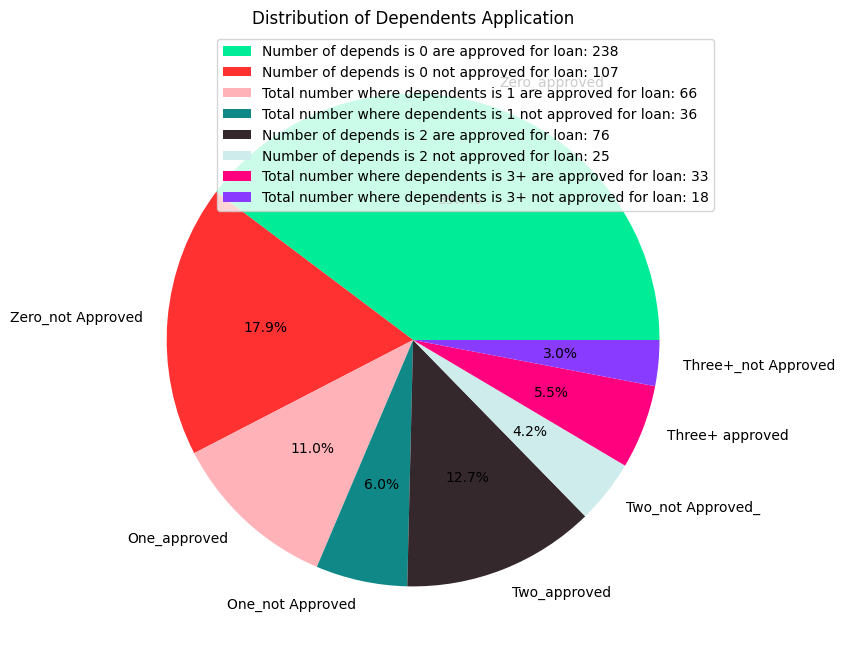

In [7]:
#For the pie chart
plt.figure(figsize=(8, 8))
plt.pie([Zero_approved_count, Zero_notApproved_count, One_approved_count, One_notApproved_count, Two_approved_count, Two_notApproved_count, Three_approved_count, Three_notApproved_count], 
        labels=['Zero_approved', 'Zero_not Approved', 'One_approved', 'One_not Approved', 'Two_approved', 'Two_not Approved_', 'Three+ approved', 'Three+_not Approved'], 
        colors=['#00ec96', '#ff3131', '#ffb3b9', '#118888', '#34282C', '#CFECEC', '#FF007F', '#893bff'], autopct='%1.1f%%')
plt.title('Distribution of Dependents Application')
plt.legend(labels=[f"Number of depends is 0 are approved for loan: {Zero_approved_count}",
                   f"Number of depends is 0 not approved for loan: {Zero_notApproved_count}",
                   f"Total number where dependents is 1 are approved for loan: {One_approved_count}",
                   f"Total number where dependents is 1 not approved for loan: {One_notApproved_count}",
                   f"Number of depends is 2 are approved for loan: {Two_approved_count}",
                   f"Number of depends is 2 not approved for loan: {Two_notApproved_count}",
                   f"Total number where dependents is 3+ are approved for loan: {Three_approved_count}",
                   f"Total number where dependents is 3+ not approved for loan: {Three_notApproved_count}",
                   f"Total number of missing values: {missing_values_of_Dependents}",
                   f"The percentage of missing values is {percentage_missing_data:.2f}% "],
                   loc='upper right', facecolor=None)
plt.show()

# Creating the bar graph

Now we check the it through a bar-graph which properly demostrates the data side by side for an easier visual representation

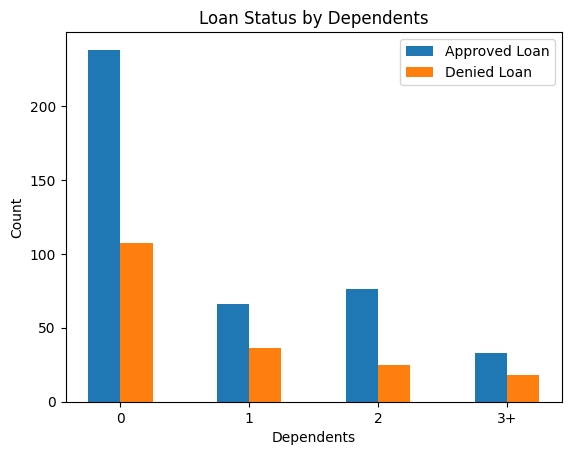

In [8]:
#Creating the histograph to represent the data
dependents = ['0', '1', '2', '3+']
approved_count = [Zero_approved_count,One_approved_count, Two_approved_count, Three_approved_count]
denied_count = [Zero_notApproved_count, One_notApproved_count, Two_notApproved_count, Three_notApproved_count]

bar_width = 0.25
index = range(len(dependents))

fig, ax = plt.subplots()
bars1 = ax.bar(index, approved_count, bar_width, label='Approved Loan')
bars2 = ax.bar([i + bar_width for i in index], denied_count, bar_width, label='Denied Loan')

ax.set_xlabel('Dependents')
ax.set_ylabel('Count')
ax.set_title('Loan Status by Dependents')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(dependents)
ax.legend()

plt.show()

For Dependents there are 4 outcomes: 0 dependents, 1 dependent, 2 dependents, and 3+ dependents. Through the data, 15 values are missing but this only counts for about 2.44% of the data total missing. When compared to the Loan_Status: 
39.7% are people with zero dependents and got the loan approved
17.9% are people with zero dependents and got denied for the loan
11% are people with one dependent and got the loan
6% are people with one dependent and didn’t get the loan
12.7% are people with 2 dependent and got the loan
4.2% are people with 2 dependent and didn't get the loan
5.5% are people with 3 or more dependents who got the loan
3% are people with 3 or more dependents who didn’t get the loan

With this data it can be seen that if you have no dependents, the high the chance of you getting the loan
